# 2D Data Preprocessing

In [1]:
import os
import glob
import pydicom
import pandas as pd

DATA_DIR = "train/"
patients = os.listdir(DATA_DIR)
train_image_files = sorted(glob.glob(os.path.join(DATA_DIR, '*','*.dcm')))

labels_df = pd.read_csv("train.csv", index_col=0)

In [2]:
import cv2
import math
import numpy as np
import matplotlib.pyplot as plt

IMG_SIZE = 100     # recommended minimum: 70
SAVE_FILE = "{}data-{}x{}.npy".format("train", IMG_SIZE, IMG_SIZE)

In [3]:
def mean(l):
    return sum(l)/len(l)

def normalize(a):
    a[a < 0] = 0
    norm = np.linalg.norm(a)
    if norm == 0:
        return a
    return a / norm


def process_data(patient, labels_df, img_px_size=70, num_slices=20):
    
    print(patient)
    path = os.path.join(DATA_DIR, patient)
    slices = [pydicom.read_file(os.path.join(path, file)) for file in os.listdir(path)]
    slices.sort(key = lambda x: int(x.ImagePositionPatient[2])) # sorts images serially
    
    FVC = np.array(labels_df.at[patient, "FVC"])
    Weeks = np.array(labels_df.at[patient, "Weeks"])
    m, b = np.polyfit(Weeks, FVC, 1) # y = m*x + b; where x = Weeks, and y = FVC
    
    new_slices = []
    slopes = []
    intercepts = []
   
    for each_slice in slices:
        new_slices.append(cv2.resize(normalize(each_slice.pixel_array), (img_px_size, img_px_size)))
        slopes.append(-m)
        intercepts.append(b)

        
    '''
    Obtain slope of FVC Score as label
    Possibly check R^2 values as a counterpart to confidence score
    Check if non-linear functions describe FVC trends better than linear functions
    If so, brainstorm a numeric readout (to replace slope) from the non-linear f(x) that works best
    '''
    
   
    return np.array(new_slices), np.array(slopes), np.array(intercepts)

In [4]:
much_data = []
slopes_data = [] 
intercepts_data = []
num_key_errors = 0
num_run_errors = 0
num_attribute_errors = 0

for num, patient in enumerate(patients):
    if num%100 == 0 and num != 0:
        print(num)

    
    """
    This is a work-around for files that require GDCM to read. Try implementing get_pixeldata() method.
    """      
    try:
        img_data, slopes_data, intercepts_data = process_data(patient, 
                                                              labels_df, 
                                                              img_px_size=IMG_SIZE) 
        
        """Try a dictionary for img_data to make the dimensions the same across *_data"""
        much_data += zip(img_data, slopes_data, intercepts_data)
        
        
    except KeyError:
        print("Unlabeled data!") # error that Sentdex handled
        num_key_errors += 1
        
    except RuntimeError:
        print("GDCM required!") # error that requires GDCM dependency
        num_run_errors += 1
        
    except AttributeError:
        print("Missing ImagePositionPatient!") # use 
        num_attribute_errors += 1    
  
    
    
np.save(SAVE_FILE, much_data, allow_pickle=True)
print("Save successful!")

if num_key_errors:
    print("KeyErrors: {}".format(num_key_errors))
if num_run_errors:
    print("Runtime Errors: {}".format(num_run_errors))
if num_attribute_errors:
    print("Attribute Errors: {}".format(num_attribute_errors))

ID00007637202177411956430
ID00009637202177434476278
ID00010637202177584971671
ID00011637202177653955184
GDCM required!
ID00012637202177665765362
ID00014637202177757139317
ID00015637202177877247924
ID00019637202178323708467
ID00020637202178344345685
ID00023637202179104603099
ID00025637202179541264076
ID00026637202179561894768
Missing ImagePositionPatient!
ID00027637202179689871102
ID00030637202181211009029
ID00032637202181710233084
ID00035637202182204917484
ID00038637202182690843176
ID00042637202184406822975
ID00047637202184938901501
ID00048637202185016727717
ID00051637202185848464638
ID00052637202186188008618
GDCM required!
ID00060637202187965290703
ID00061637202188184085559
ID00062637202188654068490
ID00067637202189903532242
ID00068637202190879923934
ID00072637202198161894406
ID00073637202198167792918
ID00075637202198610425520
ID00076637202199015035026
ID00077637202199102000916
ID00078637202199415319443
ID00082637202201836229724
ID00086637202203494931510
ID00089637202204675567570
ID00

In [5]:
print(much_data[0])

(array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), 3.167125870069571, 2174.4161832946634)


In [6]:
np.shape(much_data[0][0])

(100, 100)

In [7]:
much_data[529][2]

3311.6896077352417

In [8]:
images = np.load(SAVE_FILE, allow_pickle=True)
images.shape

(31990, 3)

In [9]:
print(images)

[[array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
  3.167125870069571 2174.4161832946634]
 [array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
  3.167125870069571 2174.4161832946634]
 [array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])
  3.167125870069571 2174.4161832946634]
 ...
 [array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        9.01696379e-07, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.

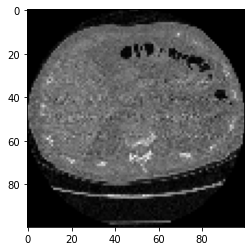

In [10]:
plt.imshow(images[0][0], cmap='gray')

In [11]:
# import scipy.ndimage as ndimage
# from skimage import measure, morphology, segmentation
# from skimage.measure import label, regionprops
# from skimage.segmentation import clear_border
# from sklearn.cluster import KMeans

# def make_lungmask(img, display=False):
#     row_size= img.shape[0]
#     col_size = img.shape[1]
    
#     mean = np.mean(img)
#     std = np.std(img)
#     img = img-mean
#     img = img/std
    
#     # Find the average pixel value near the lungs
#     # to renormalize washed out images
#     middle = img[int(col_size/5):int(col_size/5*4),int(row_size/5):int(row_size/5*4)] 
#     mean = np.mean(middle)  
#     max = np.max(img)
#     min = np.min(img)
    
#     # To improve threshold finding, I'm moving the 
#     # underflow and overflow on the pixel spectrum
#     img[img==max]=mean
#     img[img==min]=mean
    
#     # Using Kmeans to separate foreground (soft tissue / bone) and background (lung/air)
    
#     kmeans = KMeans(n_clusters=2).fit(np.reshape(middle,[np.prod(middle.shape),1]))
#     centers = sorted(kmeans.cluster_centers_.flatten())
#     threshold = np.mean(centers)
#     thresh_img = np.where(img<threshold,1.0,0.0)  # threshold the image

#     # First erode away the finer elements, then dilate to include some of the pixels surrounding the lung.  
#     # We don't want to accidentally clip the lung.

#     eroded = morphology.erosion(thresh_img,np.ones([3,3]))
#     dilation = morphology.dilation(eroded,np.ones([8,8]))

#     labels = measure.label(dilation) # Different labels are displayed in different colors
#     label_vals = np.unique(labels)
#     regions = measure.regionprops(labels)
#     good_labels = []
#     for prop in regions:
#         B = prop.bbox
#         if B[2]-B[0]<row_size/10*9 and B[3]-B[1]<col_size/10*9 and B[0]>row_size/5 and B[2]<col_size/5*4:
#             good_labels.append(prop.label)
#     mask = np.ndarray([row_size,col_size],dtype=np.int8)
#     mask[:] = 0


#     #  After just the lungs are left, we do another large dilation
#     #  in order to fill in and out the lung mask 
    
#     for N in good_labels:
#         mask = mask + np.where(labels==N,1,0)
#     mask = morphology.dilation(mask,np.ones([10,10])) # one last dilation

#     if (display):
#         fig, ax = plt.subplots(3, 2, figsize=[12, 12])
#         ax[0, 0].set_title("Original")
#         ax[0, 0].imshow(img, cmap='gray')
#         ax[0, 0].axis('off')
#         ax[0, 1].set_title("Threshold")
#         ax[0, 1].imshow(thresh_img, cmap='gray')
#         ax[0, 1].axis('off')
#         ax[1, 0].set_title("After Erosion and Dilation")
#         ax[1, 0].imshow(dilation, cmap='gray')
#         ax[1, 0].axis('off')
#         ax[1, 1].set_title("Color Labels")
#         ax[1, 1].imshow(labels)
#         ax[1, 1].axis('off')
#         ax[2, 0].set_title("Final Mask")
#         ax[2, 0].imshow(mask, cmap='gray')
#         ax[2, 0].axis('off')
#         ax[2, 1].set_title("Apply Mask on Original")
#         ax[2, 1].imshow(mask*img, cmap='gray')
#         ax[2, 1].axis('off')
        
#         plt.show()
#     return mask*img